## License Information
---

This file is distributed as part of `hvsrpy`, a Python package for horizontal-to-vertical spectral ratio processing.

    Copyright (C) 2019-2020 Joseph P. Vantassel (jvantassel@utexas.edu)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.
    
## About _hvsrpy_
---

`hvsrpy` is a Python package for performing horizontal-to-vertical spectral ratio
(H/V) processing. `hvsrpy` was developed by Joseph P. Vantassel under the supervision
of Professor Brady R. Cox at The University of Texas at Austin. 

If you use _hvsrpy_ in your research or consulting, we ask you please cite the following:

> Joseph Vantassel. (2020). jpvantassel/hvsrpy: latest (Concept). Zenodo.
> [http://doi.org/10.5281/zenodo.3666956](http://doi.org/10.5281/zenodo.3666956)

_Note: For software, version specific citations should be preferred to
general concept citations, such as that listed above. To generate a version
specific citation for `hvsrpy`, please use the citation tool on the `hvsrpy`
[archive](http://doi.org/10.5281/zenodo.3666956)._

This notebook implements automatic checking of the SESAME (2004) reliability and clarity critera.
To recognize their original work please also cite the following:

> SESAME. (2004). Guidelines for the Implementation of the H/V Spectral Ratio Technique on Ambient Vibrations
> Measurements, Processing, and Interpretation. European Commission - Research General Directorate, 62,
> European Commission - Research General Directorate.

## About this notebook
---

This notebook illustrates how to use _hvsrpy_ to automatically check the SESAME (2004) peak clarity criteria.
The notebook assumes you have already processed your data using _hvsrpy_ and have a _hvsrpy_ compliant output file.
The output file is parsed for the revalent data, plots a simple figure for reference, and assess the SESAME reliability
and clarity critera. Note for curves with multiple peaks search limits can be applied for the checking of non-primary
peaks (not shown), however you must provide the correct estmate of a secondary peaks standard deviation for
critera (v) of the clarity criteria because _hvsrpy_ currently only calculates the standard deviation from the time
windows for a single peak.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from hvsrpy import utils

In [2]:
def sesame(data, search_limits=None):
    """Check SESAME criteria."""
    if data["distribution_mc"] == "log-normal":
        std_curve = np.log(data["upper"]) - np.log(data["curve"])
    else:
        msg = "SESAME requires median curve to follow lognormal distribution."
        raise ValueError(msg)

    if data["distribution_f0"] != "normal":
        msg = "SESAME requires f0 to follow a normal distribution."
        raise Valueerror(msg)
    
    reliability = utils.sesame_reliability(data["windowlength"], data["accepted_windows"], data["frequency"], data["curve"], std_curve, search_limits=search_limits, verbose=2)
    clarity = utils.sesame_clarity(data["frequency"], data["curve"], std_curve, data["std_f0"], search_limits=search_limits, verbose=2)
    
    return (reliability, clarity)
            
def plot(data):
    """Plot HVSR form data dict."""
    fig, ax = plt.subplots(figsize=(4,2), dpi=150)
    ax.plot(data["frequency"], data["curve"], color="#000000", label="$LM_{curve}$")
    ax.plot(data["frequency"], data["upper"], color="#000000", linewidth=0.5, label="$LM_{curve}\pm$1 STD")
    ax.plot(data["frequency"], data["lower"], color="#000000", linewidth=0.5)

    y_lower, y_upper = ax.get_ylim()
    x_mean, x_std = data["mean_f0"], data["std_f0"]
    x_lower, x_upper = x_mean - x_std, x_mean + x_std
    ax.fill([x_lower, x_upper, x_upper, x_lower], [y_lower, y_lower, y_upper, y_upper], color="#dddddd",
            label=r"$f_{0}$"+"$\pm$"+"1STD")
    ax.plot([x_mean, x_mean], [y_lower, y_upper], linestyle="--", color="#000000", linewidth=2, label=r"$f_{0}$")
    ax.plot(data["f0_mc"], data["amplitude_f0_mc"], color="#ababab", linestyle="", marker="d", label=r"$f_{0,mc}$")
    ax.set_ylim((y_lower, y_upper))
    
    old_handles, old_labels = ax.get_legend_handles_labels()
    xs = [0,1,2,4,3]
    new_handles, new_labels = [old_handles[x] for x in xs], [old_labels[x] for x in xs]
    ax.legend(new_handles, new_labels)
    ax.set_xscale("log")
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("HVSR Amplitude")
    plt.show()

## Example 0

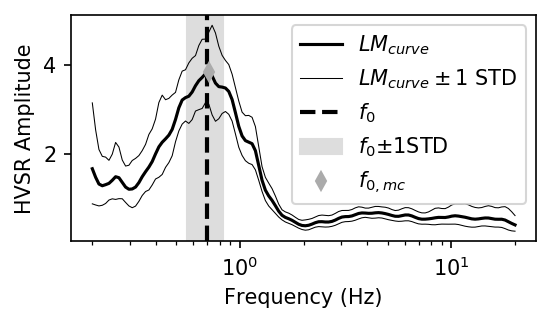

Assessing SESAME (2004) reliability criteria ... 
  Criteria i): Pass
    f0mc=0.712 is > 10/windowlength=0.167
  Criteria ii): Pass
    nc(f0mc)=1238.184 is > 200
  Criteria iii): Pass
    sigma_a(f)=1.463 is < 2
  The chosen peak PASSES the peak reliability criteria, with 3 of 3.
Assessing SESAME (2004) clarity criteria ... 
  Criteria i): Pass
    min(A[f0mc/4,f0mc])=1.222 is < A0[f0mc]/2=3.847/2=1.924
  Criteria ii): Pass
    min(A[f0mc,f0mc*4])=0.406 is < A0[f0mc]/2=3.847/2=1.924
  Criteria iii): Pass
    A0[f0mc]=3.847 is > 2.0
  Criteria iv): Pass
    f0_upper=0.738 is within 5% of f0mc=0.712.
    f0_lower=0.686 is within 5% of f0mc=0.712.
  Criteria v): Fail
    f0_std=0.1353 is not less than epsilon*mc_peak_frq=0.15*0.712=0.107.
  Criteria vi): Pass
    sigma_a_peak=1.231 is less than theta=2.
  The chosen peak PASSES the peak clarity criteria, with 5 of 6.


In [3]:
data = utils.parse_hvsrpy_output("ex0.hv")
plot(data)
reliability, clarity = sesame(data)

## Example 1

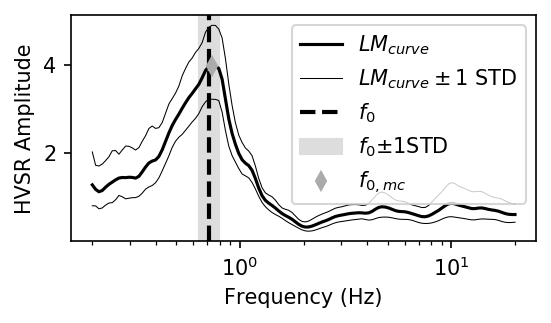

Assessing SESAME (2004) reliability criteria ... 
  Criteria i): Pass
    f0mc=0.738 is > 10/windowlength=0.167
  Criteria ii): Pass
    nc(f0mc)=2124.864 is > 200
  Criteria iii): Pass
    sigma_a(f)=1.436 is < 2
  The chosen peak PASSES the peak reliability criteria, with 3 of 3.
Assessing SESAME (2004) clarity criteria ... 
  Criteria i): Pass
    min(A[f0mc/4,f0mc])=1.133 is < A0[f0mc]/2=3.966/2=1.983
  Criteria ii): Pass
    min(A[f0mc,f0mc*4])=0.337 is < A0[f0mc]/2=3.966/2=1.983
  Criteria iii): Pass
    A0[f0mc]=3.966 is > 2.0
  Criteria iv): Pass
    f0_upper=0.738 is within 5% of f0mc=0.738.
    f0_lower=0.712 is within 5% of f0mc=0.738.
  Criteria v): Pass
    f0_std=0.0759 is less than epsilon*mc_peak_frq=0.15*0.738=0.111.
  Criteria vi): Pass
    sigma_a_peak=1.232 is less than theta=2.
  The chosen peak PASSES the peak clarity criteria, with 6 of 6.


In [4]:
data = utils.parse_hvsrpy_output("ex1.hv")
plot(data)
results = sesame(data)

## Example 2

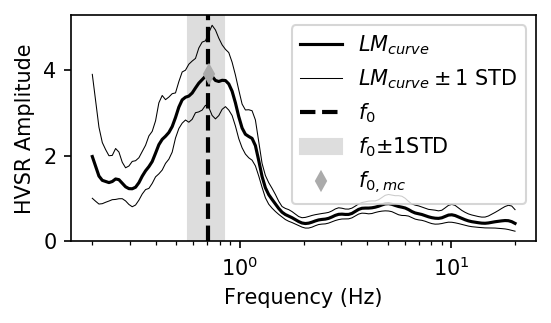

Assessing SESAME (2004) reliability criteria ... 
  Criteria i): Pass
    f0mc=0.712 is > 10/windowlength=0.167
  Criteria ii): Pass
    nc(f0mc)=1238.184 is > 200
  Criteria iii): Pass
    sigma_a(f)=1.433 is < 2
  The chosen peak PASSES the peak reliability criteria, with 3 of 3.
Assessing SESAME (2004) clarity criteria ... 
  Criteria i): Pass
    min(A[f0mc/4,f0mc])=1.23 is < A0[f0mc]/2=3.91/2=1.955
  Criteria ii): Pass
    min(A[f0mc,f0mc*4])=0.417 is < A0[f0mc]/2=3.91/2=1.955
  Criteria iii): Pass
    A0[f0mc]=3.91 is > 2.0
  Criteria iv): Pass
    f0_upper=0.738 is within 5% of f0mc=0.712.
    f0_lower=0.686 is within 5% of f0mc=0.712.
  Criteria v): Fail
    f0_std=0.1391 is not less than epsilon*mc_peak_frq=0.15*0.712=0.107.
  Criteria vi): Pass
    sigma_a_peak=1.248 is less than theta=2.
  The chosen peak PASSES the peak clarity criteria, with 5 of 6.


In [5]:
data = utils.parse_hvsrpy_output("ex2.hv")
plot(data)
results = sesame(data)

## Example 3

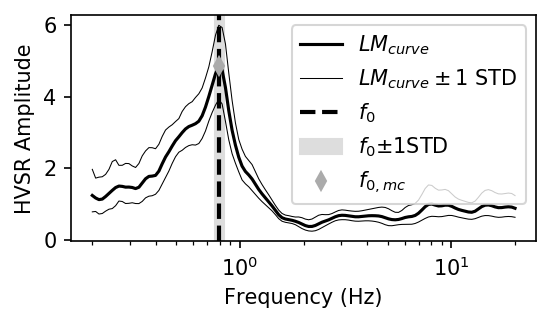

Assessing SESAME (2004) reliability criteria ... 
  Criteria i): Pass
    f0mc=0.793 is > 10/windowlength=0.167
  Criteria ii): Pass
    nc(f0mc)=1570.734 is > 200
  Criteria iii): Pass
    sigma_a(f)=1.414 is < 2
  The chosen peak PASSES the peak reliability criteria, with 3 of 3.
Assessing SESAME (2004) clarity criteria ... 
  Criteria i): Pass
    min(A[f0mc/4,f0mc])=1.121 is < A0[f0mc]/2=4.844/2=2.422
  Criteria ii): Pass
    min(A[f0mc,f0mc*4])=0.37 is < A0[f0mc]/2=4.844/2=2.422
  Criteria iii): Pass
    A0[f0mc]=4.844 is > 2.0
  Criteria iv): Pass
    f0_upper=0.793 is within 5% of f0mc=0.793.
    f0_lower=0.793 is within 5% of f0mc=0.793.
  Criteria v): Pass
    f0_std=0.0365 is less than epsilon*mc_peak_frq=0.15*0.793=0.119.
  Criteria vi): Pass
    sigma_a_peak=1.236 is less than theta=2.
  The chosen peak PASSES the peak clarity criteria, with 6 of 6.


In [6]:
data = utils.parse_hvsrpy_output("ex3.hv")
plot(data)
results = sesame(data)

## Example 4: From SESAME guidelines

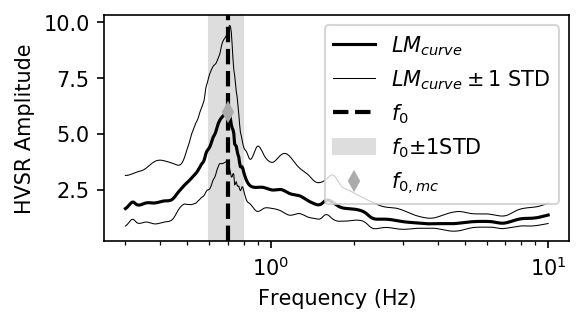

Assessing SESAME (2004) reliability criteria ... 
  Criteria i): Pass
    f0mc=0.703 is > 10/windowlength=0.167
  Criteria ii): Pass
    nc(f0mc)=2529.11 is > 200
  Criteria iii): Pass
    sigma_a(f)=1.987 is < 2
  The chosen peak PASSES the peak reliability criteria, with 3 of 3.
Assessing SESAME (2004) clarity criteria ... 
  Criteria i): Pass
    min(A[f0mc/4,f0mc])=1.647 is < A0[f0mc]/2=5.961/2=2.98
  Criteria ii): Pass
    min(A[f0mc,f0mc*4])=1.12 is < A0[f0mc]/2=5.961/2=2.98
  Criteria iii): Pass
    A0[f0mc]=5.961 is > 2.0
  Criteria iv): Pass
    f0_upper=0.712 is within 5% of f0mc=0.703.
    f0_lower=0.693 is within 5% of f0mc=0.703.
  Criteria v): Pass
    f0_std=0.098 is less than epsilon*mc_peak_frq=0.15*0.703=0.105.
  Criteria vi): Pass
    sigma_a_peak=1.619 is less than theta=2.
  The chosen peak PASSES the peak clarity criteria, with 6 of 6.


In [7]:
data = utils.parse_hvsrpy_output("ex4.hv")
plot(data)
results = sesame(data)